In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [28]:
"""
  Importamos a base de dados abalone e nomeamos suas colunas.
"""

colnames = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
            'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone = pd.read_csv("abalone-dataPI.csv", sep=',' , header=None, names=colnames, na_values=['-'])
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [29]:
"""
  Demos um describe para ter uma noção geral da base.
"""
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4167.000000,4167.000000,4167.000000,4167.000000,4144.000000,4167.00000,4161.000000,4167.000000
mean,0.655149,0.460320,0.159646,0.849997,0.419780,0.18543,0.241334,12.831293
std,2.582199,1.060604,0.405352,0.710746,1.824202,0.15271,0.160342,57.276319
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.00050,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.442500,0.186000,0.09350,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.800000,0.335750,0.17100,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.156000,0.502250,0.25400,0.330000,11.000000
max,62.500000,29.150000,11.130000,21.505000,65.800000,3.23000,3.560000,1400.000000


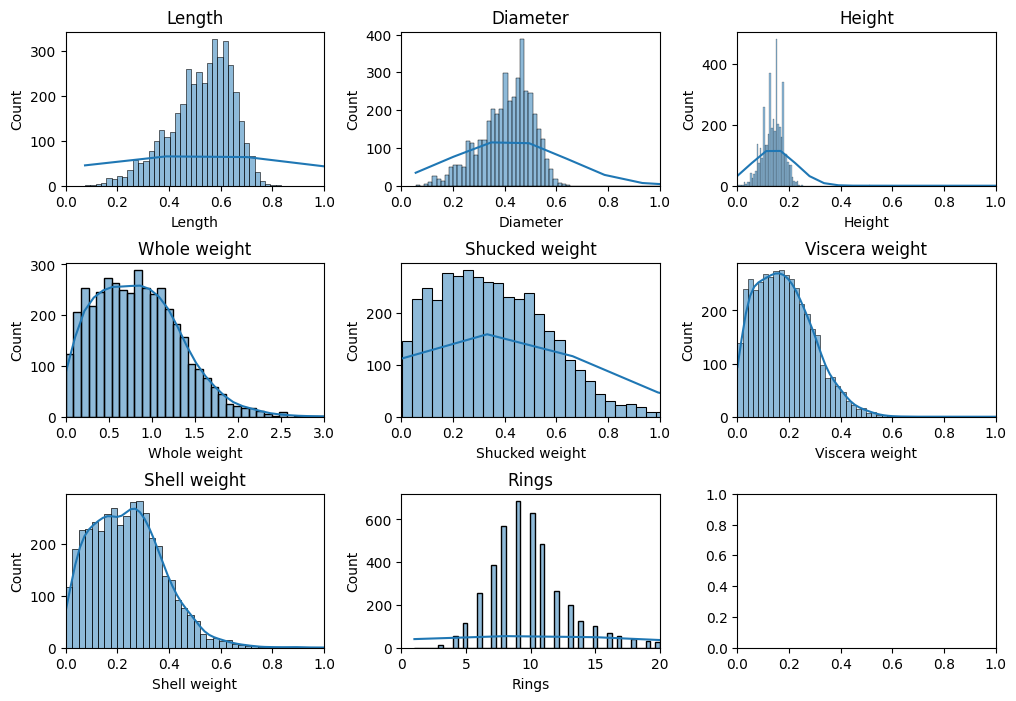

In [30]:
"""
  Podemos reparar que o dataFrame como um todo apresenta um comportamento aproximadamente normal.
"""
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, 8))

for i, col in enumerate(abalone.columns[1:]):
    linha = i // num_colunas
    coluna = i % num_colunas
    axs[linha, coluna].set_xlim(0, 1)
    sns.histplot(data=abalone[col], ax=axs[linha, coluna], kde=True)
    axs[linha, coluna].set_title(col)

axs[1, 0].set_xlim(0, 3)
axs[2, 1].set_xlim(0, 20)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

In [31]:
"""
  Filtramos os outliers do dataframe pelo método do desvio padrão, que considera como outliers os dados que estão
  a menos ou mais de 3 desvios padrões de distância da média. Essa filtragem é necessária para que esses dados
  anormais não interfiram na imputação de valores nem em futuras previsões.
"""

mean = abalone.mean()
std = abalone.std()

lim_sup = mean + 3 * std
lim_inf = mean - 3 * std

idxLimSup = abalone[abalone.drop("Rings", axis=1).gt(lim_sup).any(axis=1)].index
idxLimInf = abalone[abalone.drop("Rings", axis=1).lt(lim_inf).any(axis=1)].index

abalone.drop(idxLimSup, axis=0, inplace=True)
abalone.drop(idxLimInf, axis=0, inplace=True)

abalone

<ipython-input-31-c1b8d2671c2f>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = abalone.mean()
<ipython-input-31-c1b8d2671c2f>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = abalone.std()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [32]:
"""
  Verificamos que há alguns dados faltantes em nossa base de dados, que precisam ser tratados de alguma maneira.
"""
abalone.isna().sum()

Sex               27
Length             8
Diameter           3
Height             6
Whole weight       8
Shucked weight    25
Viscera weight     7
Shell weight      12
Rings              9
dtype: int64

In [33]:
"""
  O método escolhido para tratar os dados faltantes foi por imputação. Com excessão de Rings, que será tratado 
  de outra forma por não apresentar correlação linear com as outras colunas, todas as variáveis numéricas possuem 
  uma correlação linear consideravelmente forte com pelo menos uma das outras variáveis, tornando atrativo o uso 
  de Regressão Linear para a imputação, que funciona muito bem para dados numéricos correlacionados.
"""
abalone.corr()

<ipython-input-33-05978918a4ab>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abalone.corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986743,0.825804,0.926402,0.897966,0.900410,0.905998,0.046147
Diameter,0.986743,1.000000,0.832219,0.923545,0.893151,0.896920,0.913653,0.044577
Height,0.825804,0.832219,1.000000,0.815455,0.772382,0.794077,0.821588,0.035621
Whole weight,0.926402,0.923545,0.815455,1.000000,0.966590,0.961770,0.955192,0.036367
Shucked weight,0.897966,0.893151,0.772382,0.966590,1.000000,0.929500,0.888229,0.022667
Viscera weight,0.900410,0.896920,0.794077,0.961770,0.929500,1.000000,0.914286,0.029628
Shell weight,0.905998,0.913653,0.821588,0.955192,0.888229,0.914286,1.000000,0.036884
Rings,0.046147,0.044577,0.035621,0.036367,0.022667,0.029628,0.036884,1.000000


In [34]:
"""
  A função find_null_indices retorna uma lista dos indices das linhas que possuem dados faltantes (NAN) de 
  uma dada coluna.
"""
def find_null_indices(df, col):
    null_indices = []
    for i in range(len(df[col])):
        lin = df.index[i]
        if pd.isnull(df[col][lin]):
            null_indices.append(lin)
    return null_indices

In [35]:
"""
  A função replace_missing_values substitui usa a função anterior para encontrar os dados faltantes de uma coluna
  específica e os substitui pelos valores previstos pela Regressão Linear, que serão passados como paramentro em forma
  de lista.
"""
def replace_missing_values(df, col, pred_y):
    indices = find_null_indices(df, col)
    for i, value in enumerate(pred_y):
        lin = indices[i]
        df.loc[lin, col] = value

In [36]:
"""
  Com excessão de Rings, passamos por todas as colunas numéricas, verificando qual é a variável que possui a maior 
  correlação linear com a coluna atual, ajustamos a reta de regreção e a usamos para prever os valores faltantes. 
  Caso a variável usada para prever o valor faltante também seja NAN, usamos a variável com a segunda maior correlação.
"""

sex_col = abalone.pop('Sex')

for col in abalone.columns:
    if col != "Rings":
        #Calcula a correlação linear com todas as outras colunas, sem considerar valores faltantes
        corr = abalone.dropna().corr()[col]
        #Identifica a coluna com a maior correlação, retirando a própria coluna da iteração atual (corr=1)
        max_corr_col = corr.drop(col).idxmax()

        #Seleciona os dados da coluna com a maior correlação para ajustar a reta de regressão
        X_max_corr = abalone[[max_corr_col, col]].dropna()
        X = X_max_corr[max_corr_col].values.reshape(-1, 1)
        y = X_max_corr[col].values.reshape(-1, 1)
        reg = LinearRegression().fit(X, y)

        missing_indexes = find_null_indices(abalone, col)
        #Pega, nas linhas com valores faltantes, os valores da colunas com a maior correlação para fazer as previsões
        pred_X = abalone.loc[missing_indexes, max_corr_col].values.reshape(-1, 1)

        #Verifica se dentre os valores de pred_X há também algum valor faltante
        for i, x in enumerate(pred_X):
            if np.isnan(x):
                #Usa a coluna com a segunda maior correlação
                second_max_corr_col = corr.drop([col, max_corr_col]).idxmax()
                pred_X[i] = abalone.loc[missing_indexes[i], second_max_corr_col]

        pred_y = reg.predict(pred_X)
        #Substitui os valores faltantes pela previsão da reta de regressão
        replace_missing_values(abalone, col, pred_y)

In [37]:
"""
  Encontramos alguns valores em Rings que aparentam ser incorretos, provavelmente decorrentes de erros de digitação.
  Para esses dados, os transformaremos em NAN e faremos a imputação por KNN, junto com o resto dos dados faltantes
  dessa coluna. Pela abrupta mudança dos valores de de ring a partir de 29, qualquer valor acima foi considerado
  erro de digitação.
"""
abalone.loc[abalone['Rings'] > 30, 'Rings'] = np.nan

In [38]:
"""
  Imputamos os valores faltantes de Rings utilizando o algoritmo de KNN, que utiliza como base os valores
  dos dados mais semelhantes àquele que queremos imputar. Como não conseguimos usar a regressão nessa coluna,
  o KNN é uma boa alternativa para a imputação, nesse caso usando o KNNImputer.
"""
mean = abalone.mean()
std = abalone.std()

#Normalizando os dados antes de aplicar o algoritmo.
abalone = (abalone - abalone.mean())/abalone.std()

imputer = KNNImputer(n_neighbors=5)
abalone_imputed = imputer.fit_transform(abalone)
abalone = pd.DataFrame(abalone_imputed)

In [39]:
"""
  Assim como em Rings, imputamos os valores faltantes de Sex usando o KNN. Por se tratar uma coluna de dados 
  categóricos, a Regressão Linear não é uma opção tão interessante, por isso utilizamos o KNeighborsClassifier,
  que funciona bem com dados categóricos.
"""
abalone.insert(0, 'Sex', sex_col)
abalone.columns = colnames

#Separando os dados nulos dos não nulos
data_notnull = abalone[abalone['Sex'].notnull()]
data_null = abalone[abalone['Sex'].isnull()]

#Separando os dados de treinamento
X_train = data_notnull.drop('Sex', axis=1)
y_train = data_notnull['Sex']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

X_test = data_null.drop('Sex', axis=1)
y_pred = knn.predict(X_test)
abalone.loc[abalone['Sex'].isnull(), 'Sex'] = y_pred

In [40]:
"""
  Com isso obtemos um dataframe com os dados tratados.
"""
#Voltando os dados para as medidas originais
abalone.iloc[:, 1:] = (abalone.iloc[:, 1:] * std) + mean
#Aproximando para 6 casas decimais por causa de problemas de precisão de pontos flutuantes
abalone.iloc[:, 1:] = abalone.iloc[:, 1:].round(6)

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4106,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4107,I,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4108,I,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4109,M,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [41]:
"""
  Salvando o dataframe tratado em um arquivo .csv
"""
abalone.to_csv("abaloneTratado.csv", header=colnames, index=False)